In [82]:
import os
import numpy as np
import pandas as pd
import nltk
import re
from nltk.tokenize import word_tokenize
import glob
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter, defaultdict
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import string
from nltk.corpus import words
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [4]:
relevant_folder_path = "Papers_txt/"
nonrelevant_folder_path = 'Nonrelevant_txt/'
tokens_folder = "tokens/"
separators = "[-/.,\s\t()\n\"\"'':_\n*&^%$#@!?=><|}{;]+"

## Pre-processing Task

In [107]:
def tokenize_files(folder_path, separators):
    all_tokens = []
    for filename in glob.glob(os.path.join(folder_path, '*.txt')):
         with open(filename, 'r', encoding="utf8") as f:
                for line in f:
                    line = line.replace("\\/", "/")
                    words = re.split(separators,line)
                    tokens = word_tokenize(" ".join(words))
                    all_tokens.extend(tokens)
    return np.array(all_tokens)


def remove_non_alpha(tokens):
    words = set(nltk.corpus.words.words())
    alpha_only = []
    for token in tokens:
        if token.lower() in words or not token.isalpha():
            if(token.isalpha()):
                alpha_only.append(token)
    return np.array(alpha_only)


def write_tokens_to_file(file_path, tokens):
    with open(file_path, 'w', encoding="utf8") as file:
        for t in tokens:
            file.write(t + '\n')
    
def remove_stopwords(tokens):
    filtered_words = tokens
    with open('stop_words_english.txt', encoding="utf8") as file:
        stop_words = file.read().splitlines()
        stop_words = np.array(stop_words)
        stop_words_lower = np.char.lower(stop_words)
        stop_words_capitalized = np.char.capitalize(stop_words)
        filtered_words = filtered_words[~np.isin(tokens, stop_words)]
        filtered_words = filtered_words[~np.isin(filtered_words, stop_words_lower)]
        filtered_words = filtered_words[~np.isin(filtered_words, stop_words_capitalized)]
        return filtered_words

    
def tokens_casefold(tokens):
    lowercase_words = np.char.lower(tokens)
    return lowercase_words



def stem_tokens(tokens):
    pst = PorterStemmer()
    stemmed_tokens = []
    for token in tokens:
        stemmed_token = pst.stem(token)
        stemmed_tokens.append(stemmed_token)
    stemmed_tokens = np.array(stemmed_tokens) 
    return stemmed_tokens


def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = []
    for token in tokens:
        lemmatized_token = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemmatized_token)
    return np.array(lemmatized_tokens) 


def create_language_model_unigram(tokens):
    
    model = defaultdict(lambda: {"tf": 0, "prob": 0})
    
    for word in tokens:
            model[word]["tf"] += 1
            
    # transform to probabilities
    total_count = float(sum(model[word]["tf"] for word in model))
    for word in model:
        model[word]["prob"] = model[word]["tf"] / total_count
    return model


def freq_of_unique_words(words):
    unique_words = np.size((np.unique(words)))
    all_words = np.size(words)
    print("Number of words in our corpus: "+ str(all_words))
    print("Number of unique words in our corpus : "+ str(unique_words))

In [108]:
separators = "[-/.,\s\t()\n\"\"'':_\n*&^%$#@!?=><|}{;]+"
tokens = tokenize_files(relevant_folder_path, separators)
freq_of_unique_words(tokens)
model_base = create_language_model_unigram(tokens)
sorted_model_base = sorted(model_base.items(), key=lambda item: item[1]["tf"], reverse=True)
sorted_model_base

Number of words in our corpus: 444563
Number of unique words in our corpus : 28143


[('the', {'tf': 20038, 'prob': 0.04507347665010358}),
 ('of', {'tf': 13165, 'prob': 0.02961335063871712}),
 ('and', {'tf': 10333, 'prob': 0.02324304991643479}),
 ('to', {'tf': 8078, 'prob': 0.018170652978318033}),
 ('in', {'tf': 6811, 'prob': 0.015320663213087908}),
 ('a', {'tf': 6243, 'prob': 0.014043004028675352}),
 ('search', {'tf': 5566, 'prob': 0.012520160247254044}),
 ('that', {'tf': 4441, 'prob': 0.00998958527812706}),
 ('is', {'tf': 4228, 'prob': 0.00951046308397235}),
 ('for', {'tf': 3807, 'prob': 0.008563465695525718}),
 ('on', {'tf': 3454, 'prob': 0.007769427505212984}),
 ('0', {'tf': 2966, 'prob': 0.006671720318605012}),
 ('we', {'tf': 2351, 'prob': 0.0052883393354822604}),
 ('results', {'tf': 2342, 'prob': 0.005268094735729244}),
 ('’', {'tf': 2322, 'prob': 0.0052231067362780974}),
 ('are', {'tf': 2305, 'prob': 0.0051848669367446235}),
 ('by', {'tf': 2285, 'prob': 0.005139878937293477}),
 ('The', {'tf': 2210, 'prob': 0.004971173939351678}),
 ('as', {'tf': 2188, 'prob': 0.0

In [109]:
tokens_alpha = remove_non_alpha(tokens)
freq_of_unique_words(tokens_alpha)
model_base = create_language_model_unigram(tokens_alpha)
sorted_model_base = sorted(model_base.items(), key=lambda item: item[1]["tf"], reverse=True)
sorted_model_base

Number of words in our corpus: 308349
Number of unique words in our corpus : 10315


[('the', {'tf': 20038, 'prob': 0.06498480617741585}),
 ('of', {'tf': 13165, 'prob': 0.042695127923229846}),
 ('and', {'tf': 10333, 'prob': 0.03351072972508424}),
 ('to', {'tf': 8078, 'prob': 0.026197587798241603}),
 ('in', {'tf': 6811, 'prob': 0.022088607389678577}),
 ('a', {'tf': 6243, 'prob': 0.02024653882451378}),
 ('search', {'tf': 5566, 'prob': 0.01805097470723109}),
 ('that', {'tf': 4441, 'prob': 0.014402511439959267}),
 ('is', {'tf': 4228, 'prob': 0.013711735728022468}),
 ('for', {'tf': 3807, 'prob': 0.012346399696447857}),
 ('on', {'tf': 3454, 'prob': 0.011201593000139452}),
 ('we', {'tf': 2351, 'prob': 0.007624477458983165}),
 ('are', {'tf': 2305, 'prob': 0.007475295849832495}),
 ('by', {'tf': 2285, 'prob': 0.007410434280636552}),
 ('The', {'tf': 2210, 'prob': 0.007167203396151763}),
 ('as', {'tf': 2188, 'prob': 0.007095855670036225}),
 ('with', {'tf': 1851, 'prob': 0.006002938229084576}),
 ('from', {'tf': 1746, 'prob': 0.005662414990805872}),
 ('engine', {'tf': 1691, 'prob': 

In [110]:
tokens_no_stopwords = remove_stopwords(tokens_alpha)
freq_of_unique_words(tokens_no_stopwords)
model_no_stopwords = create_language_model_unigram(tokens_no_stopwords)
sorted_model_no_stopwords = sorted(model_no_stopwords.items(), key=lambda item: item[1]["tf"], reverse=True)
sorted_model_no_stopwords

Number of words in our corpus: 118800
Number of unique words in our corpus : 9345


[('search', {'tf': 5566, 'prob': 0.04685185185185185}),
 ('engine', {'tf': 1691, 'prob': 0.014234006734006734}),
 ('Web', {'tf': 1342, 'prob': 0.011296296296296296}),
 ('bias', {'tf': 1342, 'prob': 0.011296296296296296}),
 ('Search', {'tf': 1091, 'prob': 0.009183501683501684}),
 ('query', {'tf': 789, 'prob': 0.006641414141414142}),
 ('content', {'tf': 700, 'prob': 0.005892255892255892}),
 ('result', {'tf': 650, 'prob': 0.005471380471380472}),
 ('user', {'tf': 605, 'prob': 0.005092592592592593}),
 ('al', {'tf': 601, 'prob': 0.005058922558922559}),
 ('data', {'tf': 571, 'prob': 0.004806397306397306}),
 ('study', {'tf': 549, 'prob': 0.0046212121212121215}),
 ('model', {'tf': 507, 'prob': 0.004267676767676767}),
 ('number', {'tf': 490, 'prob': 0.0041245791245791245}),
 ('web', {'tf': 483, 'prob': 0.004065656565656566}),
 ('Figure', {'tf': 479, 'prob': 0.004031986531986532}),
 ('set', {'tf': 461, 'prob': 0.0038804713804713804}),
 ('based', {'tf': 421, 'prob': 0.003543771043771044}),
 ('docu

In [111]:
tokens_casefolded = tokens_casefold(tokens_no_stopwords)
freq_of_unique_words(tokens_casefolded)
model_casefolded = create_language_model_unigram(tokens_casefolded)
sorted_model_casefolded = sorted(model_casefolded.items(), key=lambda item: item[1]["tf"], reverse=True)
sorted_model_casefolded

Number of words in our corpus: 118800
Number of unique words in our corpus : 7071


[('search', {'tf': 6762, 'prob': 0.05691919191919192}),
 ('engine', {'tf': 2034, 'prob': 0.01712121212121212}),
 ('web', {'tf': 1834, 'prob': 0.015437710437710438}),
 ('bias', {'tf': 1606, 'prob': 0.013518518518518518}),
 ('query', {'tf': 823, 'prob': 0.006927609427609427}),
 ('content', {'tf': 754, 'prob': 0.006346801346801347}),
 ('data', {'tf': 684, 'prob': 0.005757575757575757}),
 ('result', {'tf': 671, 'prob': 0.005648148148148148}),
 ('user', {'tf': 645, 'prob': 0.0054292929292929296}),
 ('al', {'tf': 631, 'prob': 0.005311447811447811}),
 ('study', {'tf': 610, 'prob': 0.005134680134680135}),
 ('model', {'tf': 568, 'prob': 0.004781144781144781}),
 ('number', {'tf': 532, 'prob': 0.004478114478114478}),
 ('figure', {'tf': 530, 'prob': 0.004461279461279461}),
 ('political', {'tf': 523, 'prob': 0.004402356902356902}),
 ('set', {'tf': 465, 'prob': 0.003914141414141414}),
 ('based', {'tf': 454, 'prob': 0.0038215488215488217}),
 ('media', {'tf': 453, 'prob': 0.003813131313131313}),
 ('do

In [112]:
tokens_stemmed = stem_tokens(tokens_casefolded)
freq_of_unique_words(tokens_stemmed)
model_stemmed = create_language_model_unigram(tokens_stemmed)
sorted_model_stemmed = sorted(model_stemmed.items(), key=lambda item: item[1]["tf"], reverse=True)
sorted_model_stemmed

Number of words in our corpus: 118800
Number of unique words in our corpus : 5284


[('search', {'tf': 6901, 'prob': 0.058089225589225586}),
 ('engin', {'tf': 2088, 'prob': 0.017575757575757574}),
 ('web', {'tf': 1834, 'prob': 0.015437710437710438}),
 ('bia', {'tf': 1606, 'prob': 0.013518518518518518}),
 ('queri', {'tf': 838, 'prob': 0.007053872053872054}),
 ('content', {'tf': 785, 'prob': 0.0066077441077441075}),
 ('polit', {'tf': 703, 'prob': 0.005917508417508418}),
 ('data', {'tf': 684, 'prob': 0.005757575757575757}),
 ('result', {'tf': 672, 'prob': 0.0056565656565656566}),
 ('studi', {'tf': 660, 'prob': 0.005555555555555556}),
 ('user', {'tf': 645, 'prob': 0.0054292929292929296}),
 ('al', {'tf': 631, 'prob': 0.005311447811447811}),
 ('relev', {'tf': 610, 'prob': 0.005134680134680135}),
 ('rank', {'tf': 609, 'prob': 0.005126262626262626}),
 ('posit', {'tf': 602, 'prob': 0.005067340067340068}),
 ('model', {'tf': 584, 'prob': 0.004915824915824916}),
 ('time', {'tf': 564, 'prob': 0.004747474747474748}),
 ('link', {'tf': 563, 'prob': 0.004739057239057239}),
 ('number',

In [113]:
tokens_lemmatized = lemmatize_tokens(tokens_casefolded)
freq_of_unique_words(tokens_lemmatized)
model_final = create_language_model_unigram(tokens_lemmatized)
sorted_model_final = sorted(model_final.items(), key=lambda item: item[1]["tf"], reverse=True)
sorted_model_final

Number of words in our corpus: 118800
Number of unique words in our corpus : 7011


[('search', {'tf': 6762, 'prob': 0.05691919191919192}),
 ('engine', {'tf': 2034, 'prob': 0.01712121212121212}),
 ('web', {'tf': 1834, 'prob': 0.015437710437710438}),
 ('bias', {'tf': 1606, 'prob': 0.013518518518518518}),
 ('query', {'tf': 823, 'prob': 0.006927609427609427}),
 ('content', {'tf': 784, 'prob': 0.0065993265993266}),
 ('data', {'tf': 684, 'prob': 0.005757575757575757}),
 ('result', {'tf': 671, 'prob': 0.005648148148148148}),
 ('user', {'tf': 645, 'prob': 0.0054292929292929296}),
 ('al', {'tf': 631, 'prob': 0.005311447811447811}),
 ('study', {'tf': 610, 'prob': 0.005134680134680135}),
 ('model', {'tf': 568, 'prob': 0.004781144781144781}),
 ('time', {'tf': 563, 'prob': 0.004739057239057239}),
 ('number', {'tf': 532, 'prob': 0.004478114478114478}),
 ('figure', {'tf': 530, 'prob': 0.004461279461279461}),
 ('political', {'tf': 523, 'prob': 0.004402356902356902}),
 ('link', {'tf': 507, 'prob': 0.004267676767676767}),
 ('medium', {'tf': 475, 'prob': 0.003998316498316498}),
 ('set'

In [11]:
write_tokens_to_file(tokens_folder+"tokens.txt", tokens_stemmed)
write_tokens_to_file(tokens_folder+"tokens_lemm.txt", np.unique(tokens_lemmatized))

## Classification Task

### Preparing data

In [114]:
def create_tokens_from_folder(folder):
    filenames = []
    all_tokens = []
    for filename in glob.glob(os.path.join(folder, '*.txt')):
        tokens = create_tokens_from_file(filename)
        all_tokens.append(preprocess_tokens(tokens))
        filename = filename.strip(folder)
        filename = filename.strip('\\')
        filename.strip('.txt')
        filenames.append(filename)
    return filenames, all_tokens

def create_tokens_from_file(filename):
    file_tokens = []
    with open(filename, 'r', encoding="utf8") as f:
                for line in f:
                    line = line.replace("\\/", "/")
                    words = re.split(separators,line)
                    tokens = word_tokenize(" ".join(words))
                    file_tokens.extend(tokens)
    return np.array(file_tokens)

#calls every function defined in the previous section to pre-process data
def preprocess_tokens(tokens):
    new_tokens = remove_non_alpha(tokens)
    new_tokens = remove_stopwords(new_tokens)
    new_tokens = tokens_casefold(new_tokens)
    new_tokens = lemmatize_tokens(new_tokens)
    return new_tokens

# count for each term how many times it appeared in a certain document
def count_tf_from_file_tokens(corpus, files, files_tokens):
    vectorizer = CountVectorizer(vocabulary=corpus)
    tf_array = np.zeros((len(files), len(corpus)), dtype=int)
    for i, file_tokens in enumerate(files_tokens):
        tf_vector = np.sum(vectorizer.transform(file_tokens.tolist()).toarray(), axis=0,  dtype=int)
        tf_array[i,:] = tf_vector
    return tf_array

In [115]:
### relevant files 
corpus = np.unique(tokens_lemmatized)
np.random.shuffle(corpus)
relevant_filenames, relevant_files_tokens = create_tokens_from_folder(relevant_folder_path)
relevant_tf_array = count_tf_from_file_tokens(corpus, relevant_filenames, relevant_files_tokens)
relevant_df = pd.DataFrame(index=relevant_filenames, columns = corpus, data = relevant_tf_array)
relevant_df.insert(len(corpus), 'doc_relevance', np.ones((len(relevant_filenames)), dtype=int))
relevant_df.head(3)

,ber,lucky,striven,examine,assertion,saddle,habitual,supercharged,advancement,cashier,...,elicit,multiplier,kremlin,wholly,cultivate,video,the,musician,expansive,doc_relevance
A User Browsing Model to Predict Search Engine Click Data from Past Observations.,0,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Algorithmic_Auditing__the_Holocaust__and_Search_Engine_Bias.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
An Experimental Comparison of Click Position-Bias Models.,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [116]:
### nonrelevant files 
nonrelevant_filenames, nonrelevant_files_tokens = create_tokens_from_folder(nonrelevant_folder_path)
nonrelevant_tf_array = count_tf_from_file_tokens(corpus, nonrelevant_filenames, nonrelevant_files_tokens)
nonrelevant_df = pd.DataFrame(index=nonrelevant_filenames, columns = corpus, data = nonrelevant_tf_array)
nonrelevant_df.insert(len(corpus), 'doc_relevance', np.zeros((len(relevant_filenames)), dtype=int))
nonrelevant_df.head(3)

,ber,lucky,striven,examine,assertion,saddle,habitual,supercharged,advancement,cashier,...,elicit,multiplier,kremlin,wholly,cultivate,video,the,musician,expansive,doc_relevance
A Balanced Survey on Election Prediction using.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A Causal Framework for Discovering and Removing Direct and Indirect Discrimination.,0,0,0,4,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
A Grounded Interaction Protocol for Explainable Artificial Intelligence.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [118]:
##joining data
all_data = pd.concat([relevant_df, nonrelevant_df])
all_data.index.names = ['filename']
all_data

,ber,lucky,striven,examine,assertion,saddle,habitual,supercharged,advancement,cashier,...,elicit,multiplier,kremlin,wholly,cultivate,video,the,musician,expansive,doc_relevance
filename,,,,,,,,,,,,,,,,,,,,,
A User Browsing Model to Predict Search Engine Click Data from Past Observations.,0,0,0,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Algorithmic_Auditing__the_Holocaust__and_Search_Engine_Bias.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
An Experimental Comparison of Click Position-Bias Models.,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
Auditing the Personalization and Composition of Politically-Related Search Engine Results Pages.,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,4,0,0,0,1
Auditing Web Search Results Related to the 2020 US Presidential Primary Elections Across Six Search Engines.,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Understanding the Demographics of Twitter Users.,0,0,0,10,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Unmasking-Contextual-Stereotypes_-Measuring-and-Mitigating-BERTs-Gender-Bias.,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
User attitudes towards news content personalization.,0,0,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
# K-Fold Cross-Validation
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import confusion_matrix
def cross_validation(model, _X, _y, _test_size=0.1, _cv=10):
    X_train, X_test, y_train, y_test = train_test_split(_X, _y, test_size=_test_size)
    scoring = ['accuracy', 'precision', 'recall', 'f1']
    mislabeled_data = []
    mislabeled_labels = []
    mislabeled_indices = []
    results = cross_validate(estimator=model,
                           X=_X,
                           y=_y,
                           cv=_cv,
                           scoring=scoring, return_estimator=True)
    for i, estimator in enumerate(results['estimator']):
        y_pred = estimator.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)
        for j in range(len(y_test)):
            if y_test[j] != y_pred[j]:
                mislabeled_data.append({
                'document': X_test.index[j],
                'true_label': y_test[j],
                'predicted_label': y_pred[j]
            })
    mislabeled_df = pd.DataFrame(mislabeled_data)
    return {
              "Test Accuracy scores": results['test_accuracy'],
              "Mean Test Accuracy": results['test_accuracy'].mean()*100,
              "Test Precision scores": results['test_precision'],
              "Mean Test Precision": results['test_precision'].mean(),
              "Test Recall scores": results['test_recall'],
              "Mean Test Recall": results['test_recall'].mean(),
              "Test F1 scores": results['test_f1'],
              "Mean Test F1 Score": results['test_f1'].mean()
              }, results['estimator'], mislabeled_df


In [63]:
all_data.describe()

,penetration,diet,digit,nicely,assure,big,crawler,immense,aware,light,...,finance,tuning,generally,ax,trillion,score,interplay,compassion,ranker,doc_relevance
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,...,100.000000,100.000000,100.000000,100.000000,100.00,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.030000,0.130000,0.030000,0.080000,0.020000,1.100000,0.630000,0.040000,1.150000,0.74000,...,0.380000,0.610000,1.120000,0.080000,0.01,2.650000,0.100000,0.030000,0.080000,0.500000
std,0.171447,1.011599,0.222702,0.442217,0.140705,3.740307,2.419011,0.196946,3.079338,1.54148,...,1.841058,4.175191,1.929463,0.367355,0.10,6.075909,0.502519,0.222702,0.706106,0.502519
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.500000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,...,0.000000,0.000000,1.000000,0.000000,0.00,2.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,10.000000,2.000000,4.000000,1.000000,35.000000,16.000000,1.000000,27.000000,10.00000,...,17.000000,41.000000,11.000000,3.000000,1.00,48.000000,4.000000,2.000000,7.000000,1.000000


In [119]:
## removing rare terms
data_rep = all_data.copy()
for ft in data_rep.columns:
    if( ft!= 'doc_relevance' and data_rep[ft].describe()['50%'] < 1):
        data_rep.drop(ft, axis=1, inplace=True)

X = data_rep.iloc[:, 1:-1]
Y = data_rep.iloc[:,-1]

data_rep

,test,general,language,fact,popular,approach,simply,negative,understanding,algorithm,...,search,age,conference,national,access,previous,network,reason,journal,doc_relevance
filename,,,,,,,,,,,,,,,,,,,,,
A User Browsing Model to Predict Search Engine Click Data from Past Observations.,22,3,1,4,0,0,1,0,0,5,...,35,0,1,0,0,4,1,0,0,1
Algorithmic_Auditing__the_Holocaust__and_Search_Engine_Bias.,0,0,0,0,0,0,0,0,0,0,...,48,0,0,0,1,0,0,0,0,1
An Experimental Comparison of Click Position-Bias Models.,5,4,0,2,0,2,3,3,0,0,...,24,0,7,0,0,0,0,0,0,1
Auditing the Personalization and Composition of Politically-Related Search Engine Results Pages.,3,10,0,0,0,1,0,8,1,8,...,121,1,17,1,0,10,0,0,10,1
Auditing Web Search Results Related to the 2020 US Presidential Primary Elections Across Six Search Engines.,0,5,0,4,3,2,0,1,1,3,...,216,1,6,1,1,8,0,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Understanding the Demographics of Twitter Users.,0,2,0,2,4,2,2,0,6,0,...,0,0,1,1,1,0,1,0,0,0
Unmasking-Contextual-Stereotypes_-Measuring-and-Mitigating-BERTs-Gender-Bias.,9,3,54,6,0,2,0,15,0,0,...,0,0,1,1,1,4,0,1,0,0
User attitudes towards news content personalization.,2,81,0,1,0,3,0,1,1,0,...,0,2,12,0,7,2,0,1,6,0


In [163]:
## checking remaining terms
curr_terms = data_rep.columns.to_list()
result = []
for term in curr_terms:
    for tup in sorted_model_final:
        if tup[0] == term:
            result.append(tup)
            break
            
sorted_model_cleaned = sorted(result, key=lambda item: item[1]["tf"], reverse=True)
sorted_model_cleaned

[('search', {'tf': 6762, 'prob': 0.05691919191919192}),
 ('engine', {'tf': 2034, 'prob': 0.01712121212121212}),
 ('web', {'tf': 1834, 'prob': 0.015437710437710438}),
 ('bias', {'tf': 1606, 'prob': 0.013518518518518518}),
 ('query', {'tf': 823, 'prob': 0.006927609427609427}),
 ('content', {'tf': 784, 'prob': 0.0065993265993266}),
 ('data', {'tf': 684, 'prob': 0.005757575757575757}),
 ('result', {'tf': 671, 'prob': 0.005648148148148148}),
 ('user', {'tf': 645, 'prob': 0.0054292929292929296}),
 ('al', {'tf': 631, 'prob': 0.005311447811447811}),
 ('study', {'tf': 610, 'prob': 0.005134680134680135}),
 ('model', {'tf': 568, 'prob': 0.004781144781144781}),
 ('time', {'tf': 563, 'prob': 0.004739057239057239}),
 ('number', {'tf': 532, 'prob': 0.004478114478114478}),
 ('figure', {'tf': 530, 'prob': 0.004461279461279461}),
 ('link', {'tf': 507, 'prob': 0.004267676767676767}),
 ('medium', {'tf': 475, 'prob': 0.003998316498316498}),
 ('set', {'tf': 465, 'prob': 0.003914141414141414}),
 ('based', {'

### Classification Models

In [134]:
## naive bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
nb_result, nb_model, nb_mislabeled = cross_validation(gnb, X, Y)
nb_result

{'Test Accuracy scores': array([1. , 0.7, 0.8, 1. , 0.8, 0.9, 0.9, 0.9, 0.8, 1. ]),
 'Mean Test Accuracy': 88.00000000000001,
 'Test Precision scores': array([1.        , 0.66666667, 0.71428571, 1.        , 0.71428571,
        1.        , 0.83333333, 0.83333333, 0.71428571, 1.        ]),
 'Mean Test Precision': 0.8476190476190478,
 'Test Recall scores': array([1. , 0.8, 1. , 1. , 1. , 0.8, 1. , 1. , 1. , 1. ]),
 'Mean Test Recall': 0.96,
 'Test F1 scores': array([1.        , 0.72727273, 0.83333333, 1.        , 0.83333333,
        0.88888889, 0.90909091, 0.90909091, 0.83333333, 1.        ]),
 'Mean Test F1 Score': 0.8934343434343435}

In [172]:
nb_mislabeled

,document,true_label,predicted_label
0,Query-biased Learning to Rank for Real-time Tw...,0,1


In [122]:
## svm
from sklearn import svm
svm_clf = svm.SVC()
svm_clf_results, svm_clf_model, svm_clf_mislabeled = cross_validation(svm_clf, X, Y)
svm_clf_results

{'Test Accuracy scores': array([0.8, 0.9, 0.8, 1. , 1. , 0.9, 1. , 1. , 1. , 1. ]),
 'Mean Test Accuracy': 94.0,
 'Test Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Test Precision': 1.0,
 'Test Recall scores': array([0.6, 0.8, 0.6, 1. , 1. , 0.8, 1. , 1. , 1. , 1. ]),
 'Mean Test Recall': 0.8800000000000001,
 'Test F1 scores': array([0.75      , 0.88888889, 0.75      , 1.        , 1.        ,
        0.88888889, 1.        , 1.        , 1.        , 1.        ]),
 'Mean Test F1 Score': 0.9277777777777778}

In [123]:
## knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn_results, knn_model, knn_mislabeled = cross_validation(knn, X, Y)
knn_results

{'Test Accuracy scores': array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.9]),
 'Mean Test Accuracy': 99.0,
 'Test Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Test Precision': 1.0,
 'Test Recall scores': array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.8]),
 'Mean Test Recall': 0.9800000000000001,
 'Test F1 scores': array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.88888889]),
 'Mean Test F1 Score': 0.9888888888888889}

In [125]:
## rocchio
from sklearn.neighbors import NearestCentroid
rocchio = NearestCentroid()
rocchio_results, rocchio_model, rocchio_mislabeled = cross_validation(rocchio, X, Y)
rocchio_results

{'Test Accuracy scores': array([0.7, 0.9, 0.9, 0.9, 1. , 0.9, 0.9, 1. , 0.9, 0.9]),
 'Mean Test Accuracy': 90.0,
 'Test Precision scores': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'Mean Test Precision': 1.0,
 'Test Recall scores': array([0.4, 0.8, 0.8, 0.8, 1. , 0.8, 0.8, 1. , 0.8, 0.8]),
 'Mean Test Recall': 0.8,
 'Test F1 scores': array([0.57142857, 0.88888889, 0.88888889, 0.88888889, 1.        ,
        0.88888889, 0.88888889, 1.        , 0.88888889, 0.88888889]),
 'Mean Test F1 Score': 0.8793650793650795}

In [131]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic_results, logistic_model, logistic_mislabeled = cross_validation(logistic, X, Y)
logistic_results

{'Test Accuracy scores': array([0.8, 1. , 1. , 1. , 1. , 1. , 0.9, 1. , 1. , 1. ]),
 'Mean Test Accuracy': 97.0,
 'Test Precision scores': array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.83333333, 1.        , 1.        , 1.        ]),
 'Mean Test Precision': 0.9833333333333334,
 'Test Recall scores': array([0.6, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]),
 'Mean Test Recall': 0.96,
 'Test F1 scores': array([0.75      , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.90909091, 1.        , 1.        , 1.        ]),
 'Mean Test F1 Score': 0.965909090909091}

In [132]:
logistic_mislabeled

,document,true_label,predicted_label
0,A User Browsing Model to Predict Search Engine...,1,0


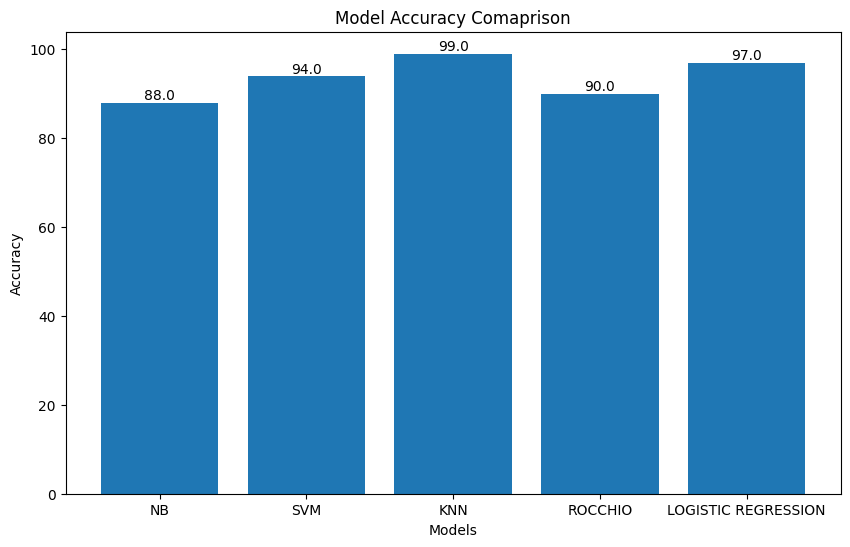

In [137]:
models = ['NB', 'SVM', 'KNN', 'ROCCHIO', 'LOGISTIC REGRESSION']
accuracy = [round(nb_result['Mean Test Accuracy'],2), svm_clf_results['Mean Test Accuracy'], 
            round(knn_results['Mean Test Accuracy'],2),
            rocchio_results['Mean Test Accuracy'], logistic_results['Mean Test Accuracy']]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracy)
plt.title('Model Accuracy Comaprison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
for i in range(len(models)):
    plt.text(i, accuracy[i], str(accuracy[i]), ha='center', va='bottom')
plt.show()

## Text Cluster

In [204]:
## definig directories
algorithmic_folder_path = 'Algorithmic transparency/'
explainable_folder_path = 'Explainable artificial intelligence/'
gender_folder_path = 'gender bias/'
folders_list = [algorithmic_folder_path, explainable_folder_path, gender_folder_path,
                relevant_folder_path]


##create tokens from 4 folders
folders_tokens = []
for folder in folders_list:
    for filename in glob.glob(os.path.join(folder, '*.txt')):
        file_tokens = create_tokens_from_file(filename)
        folders_tokens.extend(preprocess_tokens(file_tokens))

folders_tokens_array = np.unique(np.array(folders_tokens))
print(len(folders_tokens_array))

In [211]:
## creating tf arrays from all directories, based on all tokens
search_filenames, search_files_tokens = create_tokens_from_folder(relevant_folder_path)
search_tf_array = count_tf_from_file_tokens(folders_tokens_array, search_filenames, search_files_tokens)
search_df = pd.DataFrame(index=search_filenames, columns = folders_tokens_array, data = search_tf_array)
search_df['group_name'] = 'search engine bias'

algorithmic_filenames, algorithmic_files_tokens = create_tokens_from_folder(algorithmic_folder_path)
algorithmic_tf_array = count_tf_from_file_tokens(folders_tokens_array, algorithmic_filenames, algorithmic_files_tokens)
algorithmic_df = pd.DataFrame(index=algorithmic_filenames, columns = folders_tokens_array, data = algorithmic_tf_array)
algorithmic_df['group_name'] = 'Algorithmic transparency'

explainable_filenames, explainable_files_tokens = create_tokens_from_folder(explainable_folder_path)
explainable_tf_array = count_tf_from_file_tokens(folders_tokens_array, explainable_filenames, explainable_files_tokens)
explainable_df = pd.DataFrame(index=explainable_filenames, columns = folders_tokens_array, data = explainable_tf_array)
explainable_df['group_name'] = 'Explainable artificial intelligence'

gender_filenames, gender_files_tokens = create_tokens_from_folder(gender_folder_path)
gender_tf_array = count_tf_from_file_tokens(folders_tokens_array, gender_filenames, gender_files_tokens)
gender_df = pd.DataFrame(index=gender_filenames, columns = folders_tokens_array, data = gender_tf_array)
gender_df['group_name'] = 'gender bias'


In [212]:
## joining data
all_files = pd.concat([search_df, algorithmic_df, explainable_df, gender_df])
all_files.index.names = ['filename']
all_files

,a,aa,aal,aam,aba,abandon,abandoned,abandonment,abate,abb,...,zodiac,zone,zoning,zoo,zoological,zoologist,zoology,zoom,zooplankton,group_name
filename,,,,,,,,,,,,,,,,,,,,,
A User Browsing Model to Predict Search Engine Click Data from Past Observations.,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,search engine bias
Algorithmic_Auditing__the_Holocaust__and_Search_Engine_Bias.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,search engine bias
An Experimental Comparison of Click Position-Bias Models.,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,search engine bias
Auditing the Personalization and Composition of Politically-Related Search Engine Results Pages.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,search engine bias
Auditing Web Search Results Related to the 2020 US Presidential Primary Elections Across Six Search Engines.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,search engine bias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Recruitment-and-perceptions-of-gender-bias-in-party-leader-support.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,gender bias
Reducing-Gender-Bias-in-Abusive-Language-Detection.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,gender bias
Speaking-of-gender-bias.txt,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,gender bias


In [542]:
from sklearn.metrics.cluster import contingency_matrix
## purity function
def purity_score(y_true, y_pred):
    confusion_matrix = contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(confusion_matrix, axis=0)) / np.sum(confusion_matrix)

## get majority label from each cluster
def get_most_frequent_label(arr):
    values, counts = np.unique(arr, return_counts=True)
    max_count_index = np.argmax(counts)
    most_frequent_value = values[max_count_index]
    return most_frequent_value

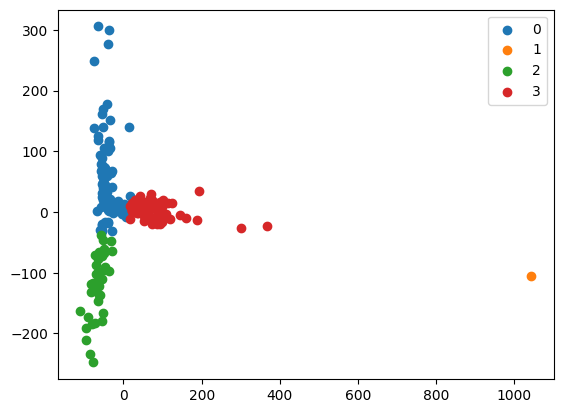

The purity score is 64.0%


In [612]:
## kmeans with pca
from sklearn.decomposition import PCA
X = all_files.iloc[:, 1:-1]
Y = all_files.iloc[:,-1]
pca = PCA(2)
df = pca.fit_transform(X)
kmeans = KMeans(n_clusters= 4, n_init='auto')
label = kmeans.fit_predict(df)
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

# Report Purity Score
purity = purity_score(Y, kmeans.labels_)
print(f"The purity score is {round(purity*100, 2)}%")

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.004s...
[t-SNE] Computed neighbors for 200 samples in 0.345s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 85.370073
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.948395
[t-SNE] KL divergence after 300 iterations: 0.569712


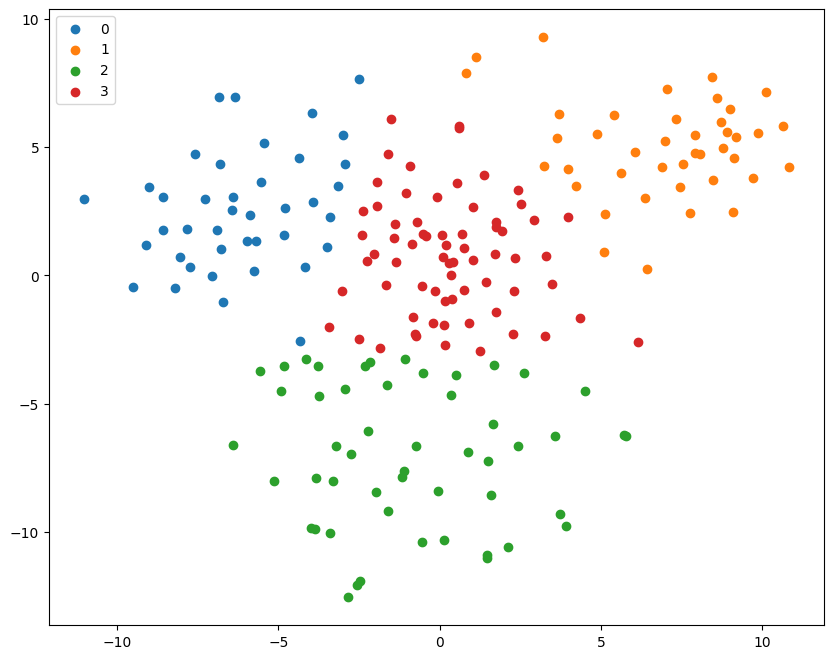

The purity score is 70.5%


In [615]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df = tsne.fit_transform(X)
kmeans = KMeans(n_clusters= 4, n_init='auto')
label = kmeans.fit_predict(df)
u_labels = np.unique(label)

fig, ax = plt.subplots(figsize=(10, 8))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

# Report Purity Score
purity = purity_score(Y, kmeans.labels_)
print(f"The purity score is {round(purity*100, 2)}%")

In [489]:
## remove rare terms
data_clean = all_files.copy()
for ft in data_clean.columns:
    if( ft!= 'group_name' and data_clean[ft].describe()['50%'] < 1):
        data_clean.drop(ft, axis=1, inplace=True)

In [540]:
data_clean_2 = data_clean.copy()
data_clean_2 = data_clean_2.drop('A governance framework for algorithmic accountability and transparency.tx')

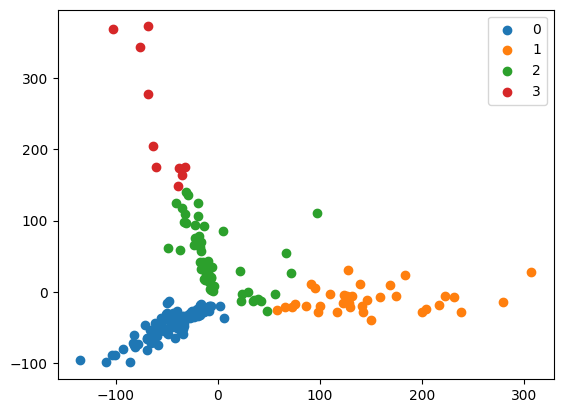

The purity score is 67.84%


In [591]:
## kmeans with pca
from sklearn.decomposition import PCA
X = data_clean_2.iloc[:, 1:-1]
Y = data_clean_2.iloc[:,-1]
pca = PCA(2)
df = pca.fit_transform(X)
kmeans = KMeans(n_clusters= 4, n_init='auto')
label = kmeans.fit_predict(df)
u_labels = np.unique(label)

#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()



# Report Purity Score
purity = purity_score(Y, kmeans.labels_)
print(f"The purity score is {round(purity*100, 2)}%")

In [598]:
## kmeans with t-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
df = tsne.fit_transform(X)
kmeans = KMeans(n_clusters= 4, n_init='auto')
label = kmeans.fit_predict(df)
u_labels = np.unique(label)

labels_dict = {}
l = get_most_frequent_label(label[0:50])
labels_dict[l] = 'Search engine bias'

l = get_most_frequent_label(label[50:100])
labels_dict[l] = 'Algorithmic transparency'

l = get_most_frequent_label(label[100:150])
labels_dict[l] = 'Explainable artificial intelligence'

l = get_most_frequent_label(label[150:200])
labels_dict[l] = 'Gender bias'

labels_dict

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 199 samples in 0.001s...
[t-SNE] Computed neighbors for 199 samples in 0.012s...
[t-SNE] Computed conditional probabilities for sample 199 / 199
[t-SNE] Mean sigma: 65.003800
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.740875
[t-SNE] KL divergence after 300 iterations: 0.288194


{2: 'Search engine bias',
 3: 'Algorithmic transparency',
 0: 'Explainable artificial intelligence',
 1: 'Gender bias'}

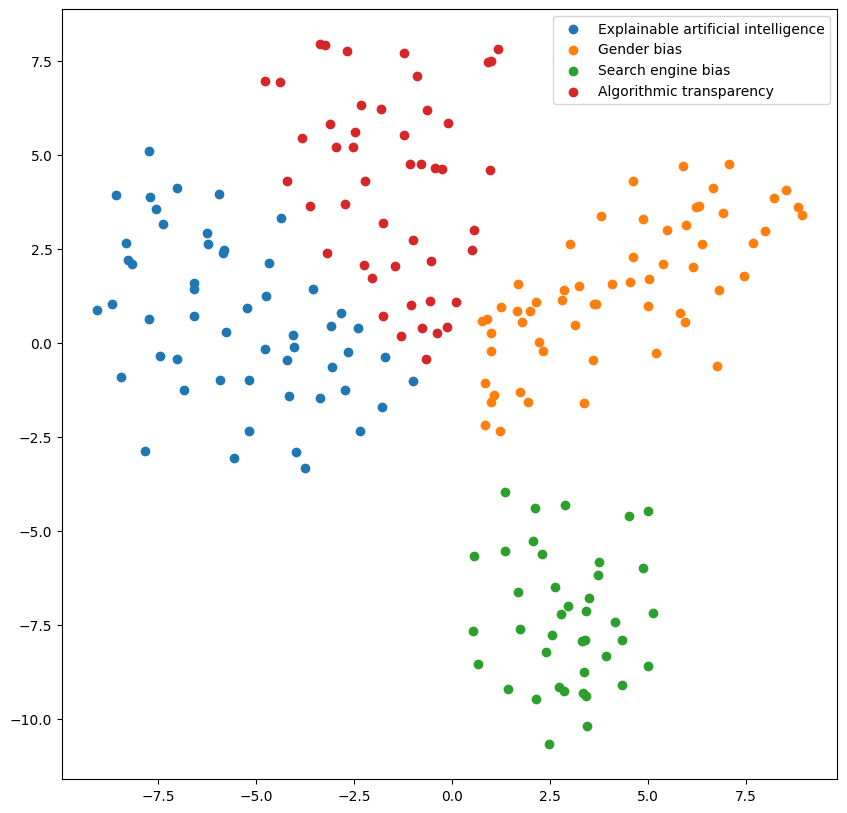

The purity score is 88.94%


In [599]:
fig, ax = plt.subplots(figsize=(10, 10))
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = labels_dict.get(i))
plt.legend()
plt.show()

# Report Purity Score
purity = purity_score(Y, kmeans.labels_)
print(f"The purity score is {round(purity*100, 2)}%")